In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

In [2]:
start_date = '2018-02-01'
end_date = '2021-09-01'

In [3]:
class holding:
    def __init__(self, ticker, weight):
        self.ticker = ticker
        self.weight = weight
        self.df = pdr.data.DataReader(ticker, 'yahoo', start_date, end_date)

In [4]:
class fund:
    def __init__(self, constituents):
        self.constituents = constituents
        
        # sum the weights of all the constituents
        self.total_weight = 0
        for c in constituents:
            self.total_weight += c.weight
        
        col = 'Close'
        self.df = pd.DataFrame()
        
        for c in constituents:
            data = c.df[col].fillna(0) * (c.weight / self.total_weight)
            if col in self.df:
                self.df[col] += data
            else:
                self.df[col] = data
    
    def plot(self):
        self.df.plot()
    
    def DataFrame(self):
        return self.df

In [5]:
constituents = [holding('AAPL', 5), holding('GOOG', 5), holding('MSFT', 5), holding('AMZN', 5)]

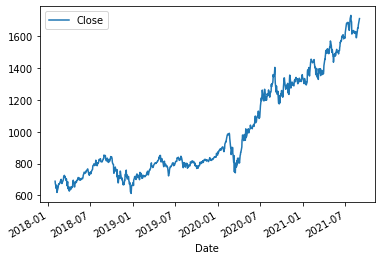

In [6]:
myFund = fund(constituents)
myFund.plot()

In [7]:
VT = pdr.data.DataReader('VT', 'yahoo', start_date, end_date)
VOO = pdr.data.DataReader('VOO', 'yahoo', start_date, end_date)
AAPL = pdr.data.DataReader('AAPL', 'yahoo', start_date, end_date)

In [8]:
print(132.690002+1751.880005)
print(0.917969+49.982655)

1884.570007
50.900624


In [9]:
VT['Close'][0]

78.33000183105469

<AxesSubplot:xlabel='Date'>

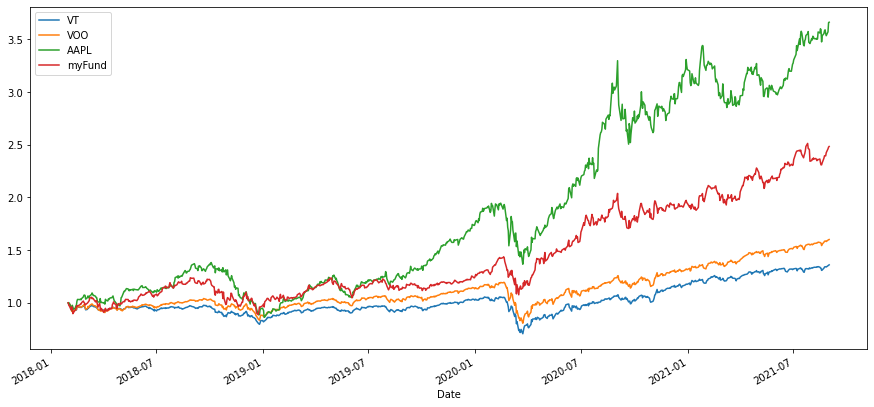

In [10]:
df = pd.DataFrame()
df["VT"] = VT["Open"] / VT['Open'].iloc[0]
df["VOO"] = VOO["Open"] / VOO['Open'].iloc[0]
df["AAPL"] = AAPL["Open"] / AAPL['Open'].iloc[0]
df["myFund"] = myFund.DataFrame()['Close'] / myFund.DataFrame()['Close'].iloc[0]

df.plot(figsize=(15,7))

In [11]:
techFund = fund([holding('AAPL', 1), holding('MSFT', 1), holding('AMZN', 1), holding('GOOG', 1), holding('FB', 1)])

In [12]:
smartMoney = fund([holding('BABA', 1), holding('AMZN', 1), holding('VIAC', 1), holding('CHTR', 1), holding('FB', 1), holding('NFLX', 1), holding('V', 1), holding('DIS', 1)])

<AxesSubplot:xlabel='Date'>

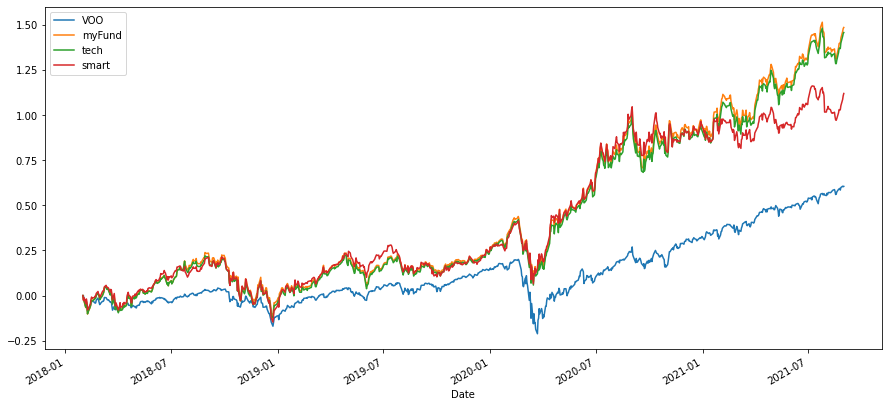

In [13]:
df = pd.DataFrame()
df["VOO"] = VOO["Close"] / VOO['Close'].iloc[0] - 1
df["myFund"] = myFund.DataFrame()['Close'] / myFund.DataFrame()['Close'].iloc[0] - 1
df["tech"] = techFund.DataFrame()['Close'] / techFund.DataFrame()['Close'].iloc[0] - 1
df["smart"] = smartMoney.DataFrame()['Close'] / smartMoney.DataFrame()['Close'].iloc[0] -1

df.plot(figsize=(15,7))